# National Income and Infant Mortality

In this Jupyter Notebook, we'll analyze the relationship between a country's GDP per capita (a measure of average income per person) and infant mortality (in particular, the share of every 1,000 children born who do not reach their fifth birthday). 

## Load Data

Data for this analysis comes from the World Bank's *World Development Indicators* database. 

In [2]:
import pandas as pd
import numpy as np

# Download World Development Indicators
wdi = pd.read_csv(
    "./worldbank.csv"
)


In [3]:
# see how many rows and columns

num_rows, num_cols = wdi.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 217
Number of columns: 129


Now let's quickly look at our data. The next command just shows us the first 5 rows of our data (we'll spend more time on these tools in later lessons). Note further than you can scroll right to see more columns!:

In [3]:
wdi.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Battle-related deaths (number of people),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,73.1264,NaN,17273.0,3.5,2.5,3.0,3.0,3.0,3.0,...,32.6,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,NaN
1,Albania,20.6922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3
2,Algeria,10.7052,28.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.8
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Now we can just print out the column names:
col_names = wdi.columns.tolist()
col_names

['Country Name',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
 'Battle-related deaths (number of people)',
 'CPIA building human resources rating (1=low to 6=high)',
 'CPIA business regulatory environment rating (1=low to 6=high)',
 'CPIA debt policy rating (1=low to 6=high)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA efficiency of revenue mobilization rating (1=low to 6=high)',
 'CPIA equity of public resource use rating (1=low to 6=high)',
 'CPIA financial sector rating (1=low to 6=high)',
 'CPIA fiscal policy rating (1=low to 6=high)',
 'CPIA gender equality rating (1=low to 6=high)',
 'CPIA macroeconomic management rating (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)',
 'CPIA property rights and rule-based gove

In [5]:
# find column names including 'GDP'
gdp_columns = wdi.filter(like='GDP').columns.tolist()
print(gdp_columns)

['GDP per capita (constant 2010 US$)', 'GDP per capita (constant LCU)', 'GDP per capita (current LCU)', 'GDP per capita (current US$)', 'GDP per capita growth (annual %)', 'GDP per capita, PPP (constant 2011 international $)', 'GDP per capita, PPP (current international $)', 'Government expenditure per student, primary (% of GDP per capita)', 'Government expenditure per student, secondary (% of GDP per capita)', 'Government expenditure per student, tertiary (% of GDP per capita)']


In [3]:
wdi.filter(like='GDP').columns

Index(['GDP per capita (constant 2010 US$)', 'GDP per capita (constant LCU)',
       'GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'GDP per capita growth (annual %)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'Government expenditure per student, primary (% of GDP per capita)',
       'Government expenditure per student, secondary (% of GDP per capita)',
       'Government expenditure per student, tertiary (% of GDP per capita)'],
      dtype='object')

# Plot the data

In [14]:
import matplotlib.pyplot as plt

# clear image
%config InlineBackend.figure_format = 'retina'


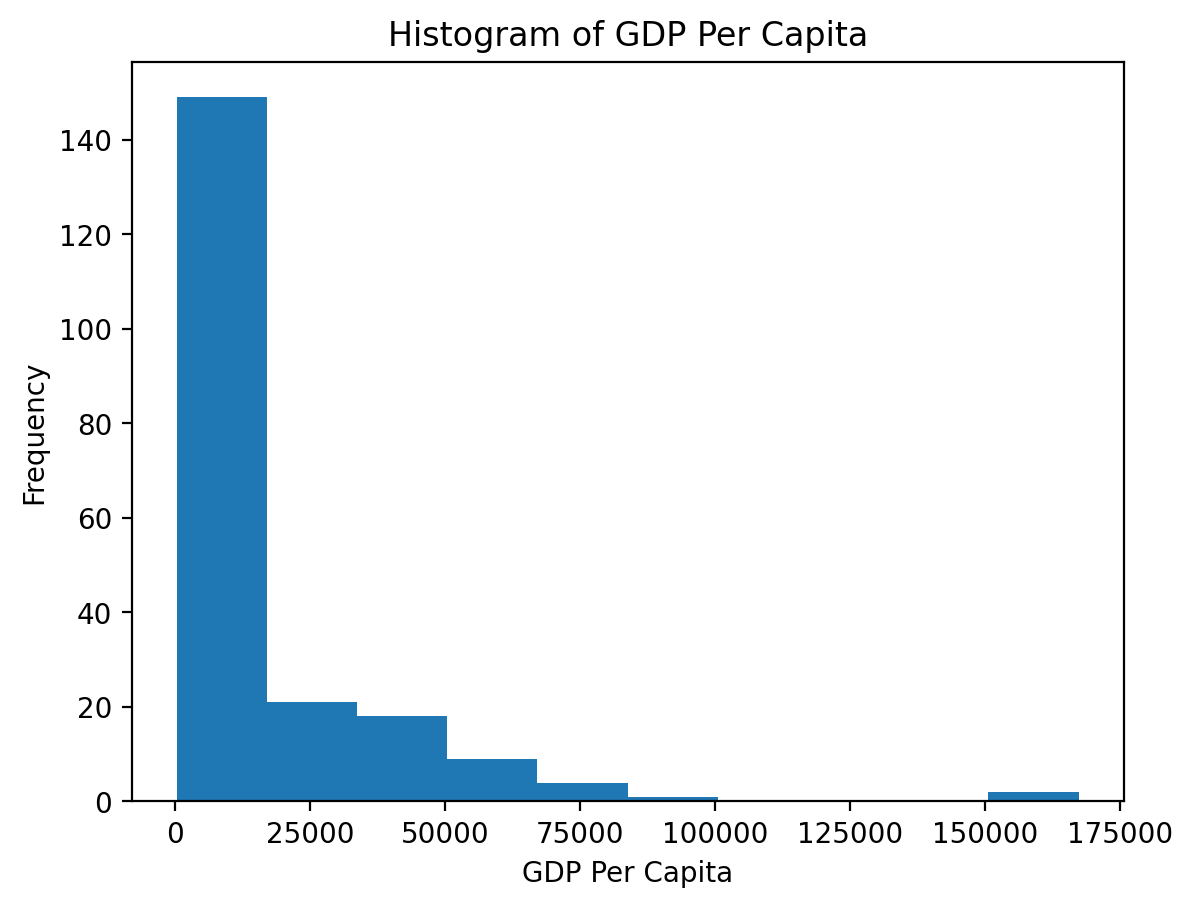

In [30]:
# draw histogram of a column 'GDP per capita (current US$)'

# you can adjust bins
plt.hist(wdi['GDP per capita (current US$)'], bins = 10) # divides the entire data range into 10 equal-sized intervals.  
 # (Descriptions : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.title('Histogram of GDP Per Capita')
plt.show()



## Visualizing the Relationship between Log GDP Per Capita and Infant Mortality

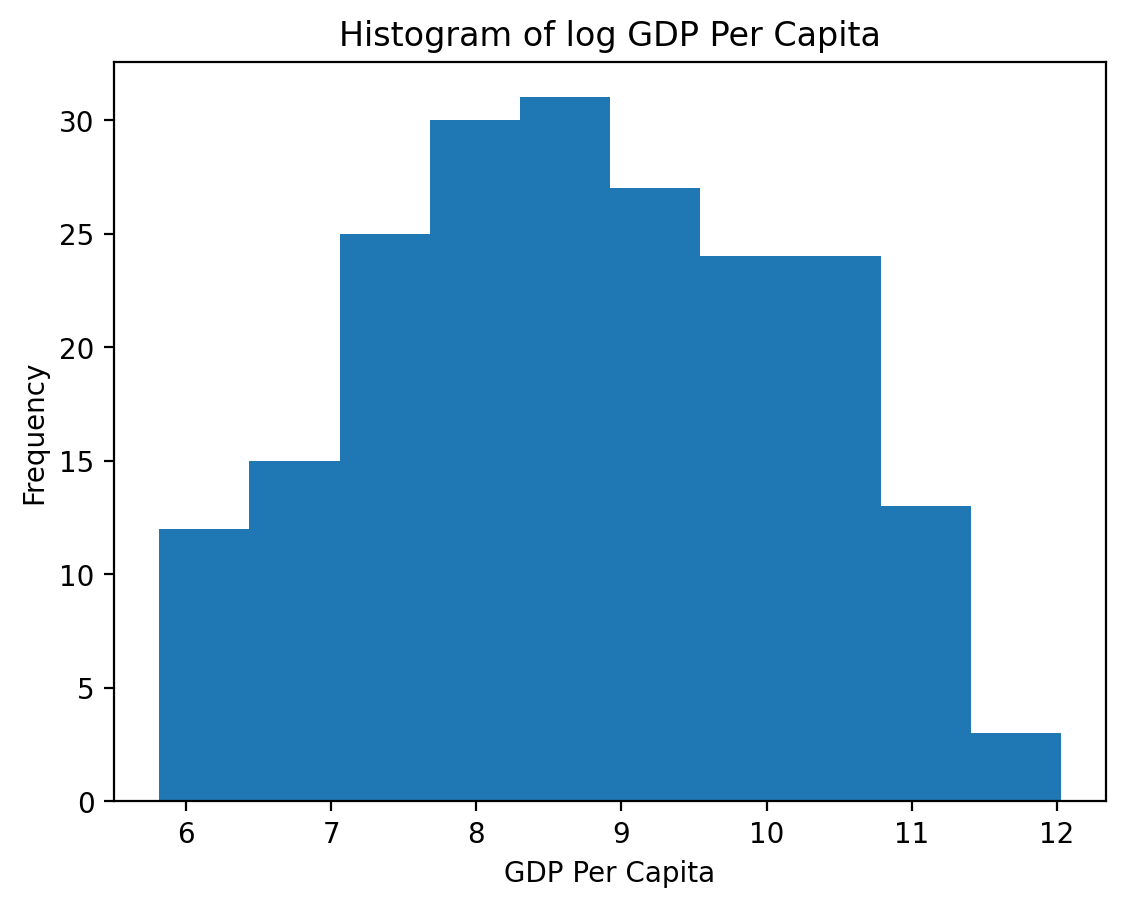

In [32]:
# GDP Per Capita has a REALLY long right tail, so we want to log it for readability.
wdi["Log GDP Per Capita"] = np.log(wdi["GDP per capita (current US$)"])

# Make sure to include the 'Log GDP' column in your dataframe.

# draw histogram of a column 'Log GDP Per Capita'
plt.hist(wdi['Log GDP Per Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.title('Histogram of log GDP Per Capita')
plt.show()


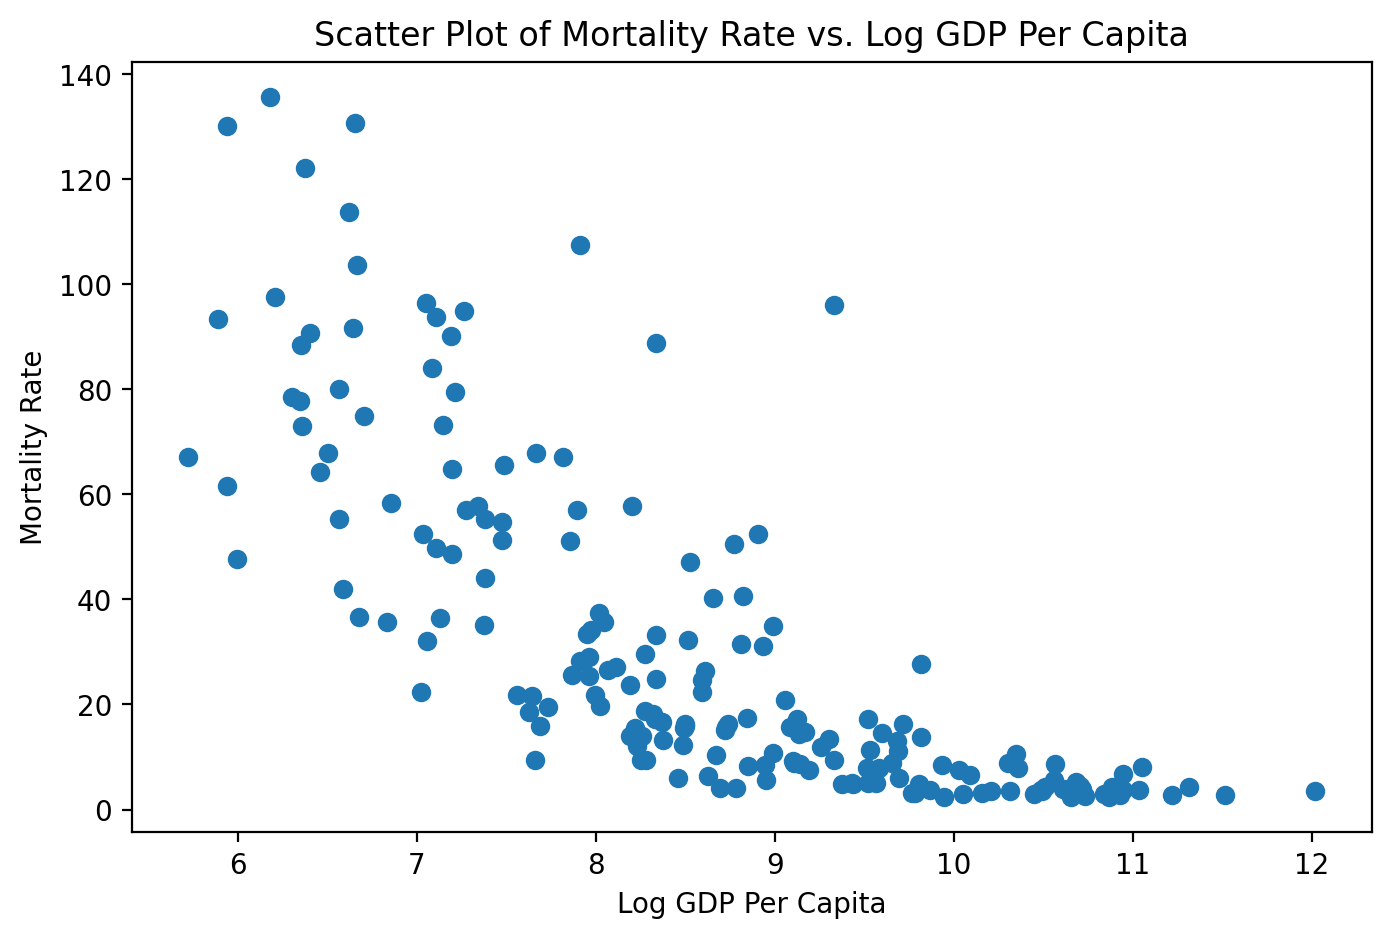

In [9]:
# Create the scatter plot
# %config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(8, 5))
plt.scatter(wdi['Log GDP Per Capita'], wdi['Mortality rate, under-5 (per 1,000 live births)'])
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Mortality Rate')
plt.title('Scatter Plot of Mortality Rate vs. Log GDP Per Capita')
plt.show()

## add a line to scatter plot

In [10]:
x = wdi['Log GDP Per Capita']
y = wdi['Mortality rate, under-5 (per 1,000 live births)']

# Fit a linear function to the data
slope, intercept = np.polyfit(x, y, 1)

# Generate x values for plotting the fit line
x_fit = np.linspace(x.min(), x.max(), 100)

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data')

# Plot the fit line
plt.plot(x_fit, slope * x_fit + intercept, color='red', label='Fitted line')

# Label the axes and add a title
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Mortality Rate')
plt.title('Linear Fit: Mortality Rate vs. Log GDP Per Capita')
plt.legend()

# Show the plot
plt.show()

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

Why this error happened?  -> we need data-preprocessing

In [11]:
# see values of a column 'Mortality rate, under-5 (per 1,000 live births)'

wdi['Mortality rate, under-5 (per 1,000 live births)']

0      73.1
1       9.4
2      24.9
3       NaN
4       3.5
       ... 
212     NaN
213    21.9
214    55.4
215    64.9
216    57.0
Name: Mortality rate, under-5 (per 1,000 live births), Length: 217, dtype: float64

In [12]:
# check how many Nulls in a column 'Mortality rate, under-5 (per 1,000 live births)'

wdi['Mortality rate, under-5 (per 1,000 live births)'].isnull().value_counts()

False    193
True      24
Name: Mortality rate, under-5 (per 1,000 live births), dtype: int64

In [13]:
# see values of a column 'Log GDP Per Capita'
wdi['Log GDP Per Capita']

0       6.360380
1       8.282187
2       8.337561
3       9.379520
4      10.492375
         ...    
212    10.457290
213     7.995594
214     7.383209
215     7.194583
216     7.275914
Name: Log GDP Per Capita, Length: 217, dtype: float64

In [14]:
# check how many Nulls in a column 'Log GDP Per Capita'
wdi['Log GDP Per Capita'].isnull().value_counts()

False    204
True      13
Name: Log GDP Per Capita, dtype: int64

In [38]:
# Remove rows with NaN values in the two columns
# don't forget to save it in another variable.
wdi_clean = wdi.dropna(subset=['Log GDP Per Capita', 'Mortality rate, under-5 (per 1,000 live births)'])

In [39]:
wdi_clean['Log GDP Per Capita'].isnull().value_counts()
# don't use 'wdi' dataframe itself 

False    189
Name: Log GDP Per Capita, dtype: int64

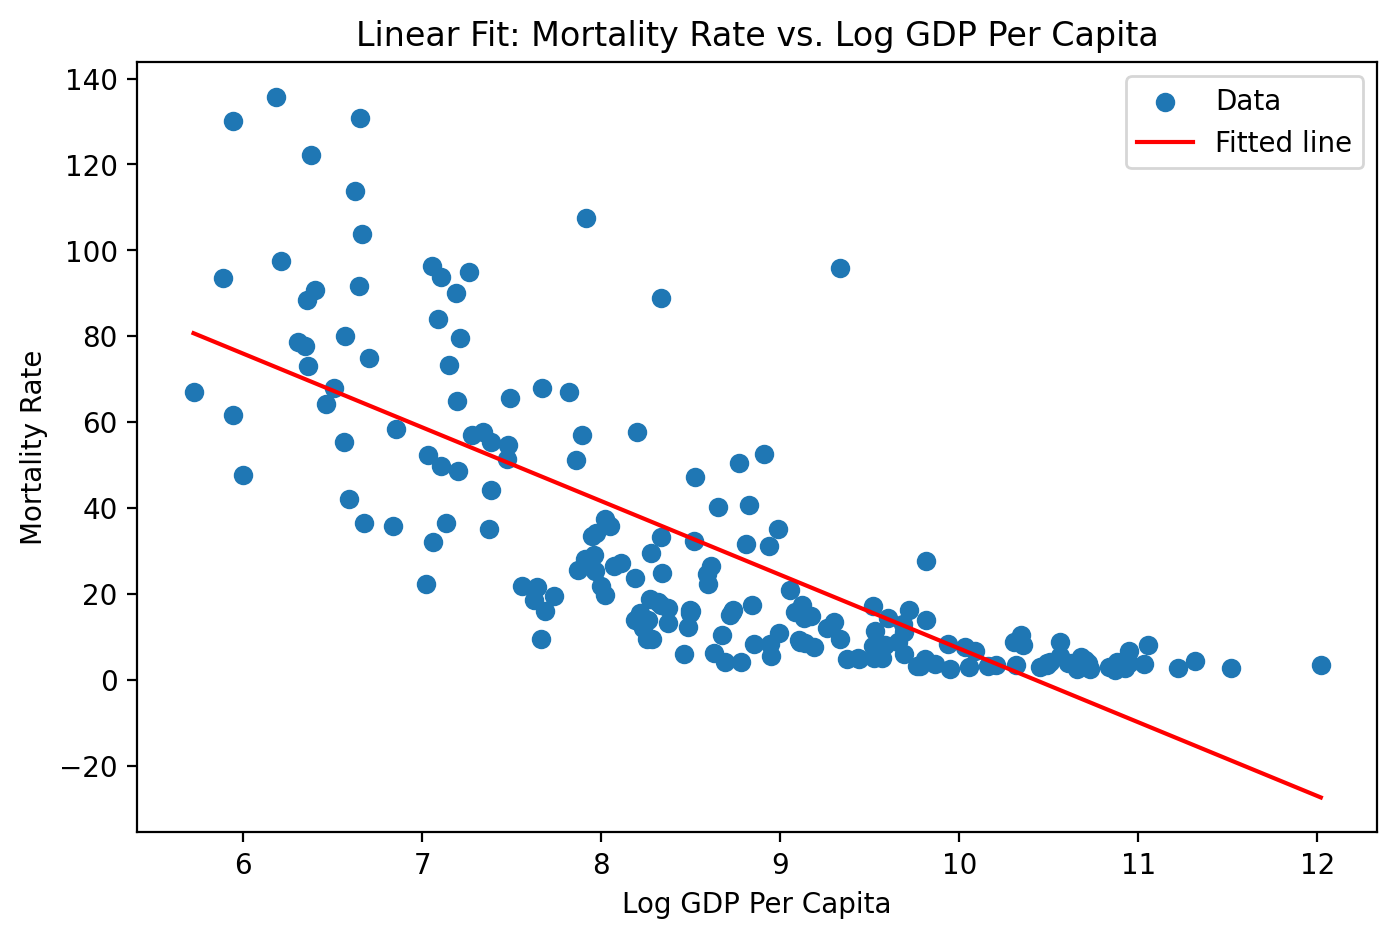

In [16]:
# Plot a scatter plot with a line

x = wdi_clean['Log GDP Per Capita']
y = wdi_clean['Mortality rate, under-5 (per 1,000 live births)']

# Polynomial Fiting with a linear function to the data
slope, intercept = np.polyfit(x, y, 1) 

# Generate x values for plotting the fit line
x_fit = np.linspace(x.min(), x.max(), 100) # Returns num evenly spaced samples, calculated over the interval 

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data')

# Plot the fit line
plt.plot(x_fit, slope * x_fit + intercept, color='red', label='Fitted line')

# Label the axes and add a title
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Mortality Rate')
plt.title('Linear Fit: Mortality Rate vs. Log GDP Per Capita')
plt.legend()

# Show the plot
plt.show()

### Q: What does the trend line suggest about the relationship between GDP per capita and mortality rate?  (Max 100 words)

Ans:  As GDP per capita increases, the mortality rate tends to decrease. 

## Let's make a concave line for the scatter plot

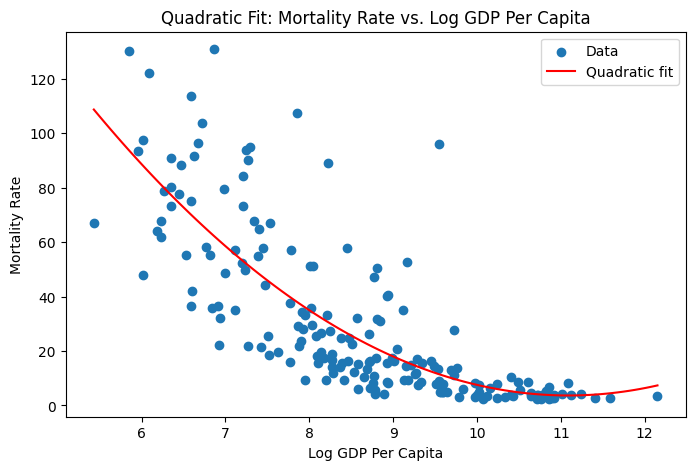

In [ ]:
# Fit a quadratic function to the data
coefficients = np.polyfit(x, y, 2)

# Generate x values for plotting the fit curve
x_fit = np.linspace(x.min(), x.max(), 100)

# Define the quadratic function using the coefficients
def quadratic(x, coeffs):
    a, b, c = coeffs
    return a*x**2 + b*x + c

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data')

# Plot the fit curve
plt.plot(x_fit, quadratic(x_fit, coefficients), color='red', label='Quadratic fit')

# Label the axes and add a title
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Mortality Rate')
plt.title('Quadratic Fit: Mortality Rate vs. Log GDP Per Capita')
plt.legend()

# Show the plot
plt.show()

### Q. How does the quadratic fit differ from the linear fit in terms of the relationship it suggests between GDP per capita and mortality rate? In which ways does the quadratic fit provide a better or worse representation of the data compared to the linear fit? (Max 100 words)

Ans : Unlike the linear fit which suggests a constant rate of decrease, the quadratic fit implies that for higher GDP per capita values, the mortality rate declines at a faster pace.

(additional point)
The quadratic fit may provide a better representation of the data if the actual relationship between the variables is non-linear, as it can capture the acceleration or deceleration in the trend that a linear model cannot. However, if the non-linear pattern is not a true characteristic of the data, the quadratic fit could overfit, meaning it captures noise as well as the signal, which might not generalize well to unseen data.


## another method

/var/folders/8b/slvdhz2n0jngxwl0lkwvg_jh0000gn/T/ipykernel_1208/1959268368.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  .theme({**style.library["seaborn-whitegrid"]})


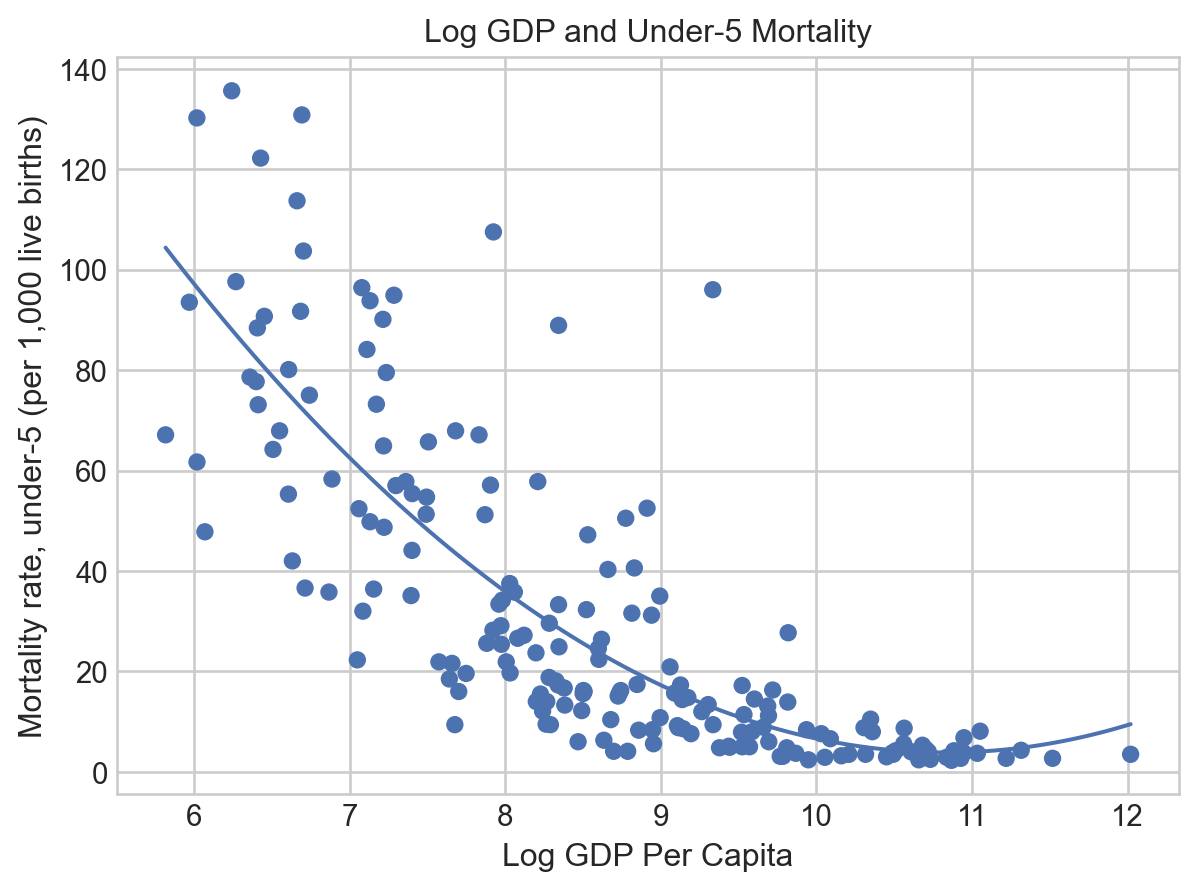

In [41]:
# Seaborn Plot (https://seaborn.pydata.org/tutorial/objects_interface.html)
import seaborn.objects as so
import seaborn as sns
from matplotlib import style

#sns.set_theme(style="whitegrid")

my_chart = (
    so.Plot(
        wdi, x="Log GDP Per Capita", y="Mortality rate, under-5 (per 1,000 live births)"
    )
    .add(so.Line(), so.PolyFit(order=2))
    .add(so.Dot())
    .label(title="Log GDP and Under-5 Mortality")
    .theme({**style.library["seaborn-whitegrid"]})
)

my_chart

### Q: Which library seems to provide a 'better' way of achieving the same result? Discuss any differences in performance between matplotlib and seaborn when creating plots. Does one have a significant advantage over the other? (Max 100 words)

Ans : Seaborn can be more efficient for creating plots that automatically include statistical analysis, like regression lines, without extra coding.